# Evaluating and Preparing Data

Table of Contents
1. Importation of Data\
    a. Import Libraries\
    b. Import Data
2. Data Consistency and Wrangling\
    a. Drop Columns\
    b. Missing Values\
    c. Duplicate Values\
    d. Mixed Data Types\
    e. Renaming Columns
3. Descriptive Statistical Analysis\
    a. Perform Statistical Analysis\
    b. Find Outliers\
    c. Visualize Outliers\
    d. Cap Outliers
4. Export Data

## 1. Importation of Data

### a. Import Libraries

In [197]:
# a. import libraries
import pandas as pd
import numpy as np
import os

### b. Import Data

In [198]:
# create path to German Apartment Analysis folder
path = r'/Users/catherinemikelson/Desktop/Career Foundry/Acheivement 6 - Advanced Analytics and Dashboard Design/German Rental Property Analysis'

In [199]:
# import original apartment data
apt_data = pd.read_csv(os.path.join(path, 'Data', 'Original Data', 'immo_data.csv'))

In [200]:
# check frame
apt_data.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.00,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,NaN,1871.0,111378734,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,1300.0,2019.0,113147523,1.0,NaN,False,Sachsen,True,9.0,965.0,4,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,NaN,1964.0,108890903,NaN,district_heating,False,Sachsen,False,2.0,343.0,35,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,2,other,9599,3.0,86.0,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,903.0,1950.0,114751222,NaN,gas,False,Bremen,False,1.0,765.0,10,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5,apartment,28213,3.0,188.9,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [201]:
# view dataset with ALL columns visible
pd.set_option('display.max_columns', None)

In [202]:
apt_data.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.00,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,NaN,1871.0,111378734,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,1300.0,2019.0,113147523,1.0,NaN,False,Sachsen,True,9.0,965.0,4,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,NaN,1964.0,108890903,NaN,district_heating,False,Sachsen,False,2.0,343.0,35,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,2,other,9599,3.0,86.0,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,903.0,1950.0,114751222,NaN,gas,False,Bremen,False,1.0,765.0,10,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5,apartment,28213,3.0,188.9,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [203]:
# check shape
apt_data.shape

(268850, 49)

## 2. Data Wrangling and Consistency

### a. Drop Columns

In [204]:
# remove unneeded columns
apt_data = apt_data.drop(columns = ['telekomTvOffer', 'noParkSpaces', 'telekomHybridUploadSpeed','telekomUploadSpeed', 'totalRent', 'floor', 'numberOfFloors', 'interiorQual','baseRentRange', 'scoutId', 'firingTypes', 'yearConstructedRange', 'houseNumber', 'livingSpace', 'street', 'streetPlain', 'thermalChar', 'noRoomsRange', 'livingSpaceRange', 'description', 'facilities', 'heatingCosts','energyEfficiencyClass', 'lastRefurbish', 'electricityBasePrice', 'electricityKwhPrice', 'date'])

In [205]:
apt_data.head()

,regio1,serviceCharge,heatingType,newlyConst,balcony,picturecount,pricetrend,yearConstructed,hasKitchen,geo_bln,cellar,baseRent,geo_krs,condition,petsAllowed,lift,typeOfFlat,geo_plz,noRooms,garden,regio2,regio3
0,Nordrhein_Westfalen,245.00,central_heating,False,False,6,4.62,1965.0,False,Nordrhein_Westfalen,True,595.0,Dortmund,well_kept,NaN,False,ground_floor,44269,4.0,True,Dortmund,Schüren
1,Rheinland_Pfalz,134.00,self_contained_central_heating,False,True,8,3.47,1871.0,False,Rheinland_Pfalz,False,800.0,Rhein_Pfalz_Kreis,refurbished,no,False,ground_floor,67459,3.0,False,Rhein_Pfalz_Kreis,Böhl_Iggelheim
2,Sachsen,255.00,floor_heating,True,True,8,2.72,2019.0,False,Sachsen,True,965.0,Dresden,first_time_use,NaN,True,apartment,1097,3.0,False,Dresden,Äußere_Neustadt_Antonstadt
3,Sachsen,58.15,district_heating,False,True,9,1.53,1964.0,False,Sachsen,False,343.0,Mittelsachsen_Kreis,NaN,NaN,False,other,9599,3.0,False,Mittelsachsen_Kreis,Freiberg
4,Bremen,138.00,self_contained_central_heating,False,True,19,2.46,1950.0,False,Bremen,False,765.0,Bremen,refurbished,NaN,False,apartment,28213,3.0,False,Bremen,Neu_Schwachhausen


In [206]:
# remove redundant location columns
apt_data = apt_data.drop(columns = ['geo_bln', 'geo_krs'])

In [207]:
apt_data.head()

,regio1,serviceCharge,heatingType,newlyConst,balcony,picturecount,pricetrend,yearConstructed,hasKitchen,cellar,baseRent,condition,petsAllowed,lift,typeOfFlat,geo_plz,noRooms,garden,regio2,regio3
0,Nordrhein_Westfalen,245.00,central_heating,False,False,6,4.62,1965.0,False,True,595.0,well_kept,NaN,False,ground_floor,44269,4.0,True,Dortmund,Schüren
1,Rheinland_Pfalz,134.00,self_contained_central_heating,False,True,8,3.47,1871.0,False,False,800.0,refurbished,no,False,ground_floor,67459,3.0,False,Rhein_Pfalz_Kreis,Böhl_Iggelheim
2,Sachsen,255.00,floor_heating,True,True,8,2.72,2019.0,False,True,965.0,first_time_use,NaN,True,apartment,1097,3.0,False,Dresden,Äußere_Neustadt_Antonstadt
3,Sachsen,58.15,district_heating,False,True,9,1.53,1964.0,False,False,343.0,NaN,NaN,False,other,9599,3.0,False,Mittelsachsen_Kreis,Freiberg
4,Bremen,138.00,self_contained_central_heating,False,True,19,2.46,1950.0,False,False,765.0,refurbished,NaN,False,apartment,28213,3.0,False,Bremen,Neu_Schwachhausen


In [208]:
apt_data.shape

(268850, 20)

### b. Missing Values

In [209]:
# check for missing values
apt_data.isnull().sum()

regio1                  0
serviceCharge        6909
heatingType         44856
newlyConst              0
balcony                 0
picturecount            0
pricetrend           1832
yearConstructed     57045
hasKitchen              0
cellar                  0
baseRent                0
condition           68489
petsAllowed        114573
lift                    0
typeOfFlat          36614
geo_plz                 0
noRooms                 0
garden                  0
regio2                  0
regio3                  0
dtype: int64

#### NOTE: I will leave the qualitative missing values as they are.  The missing quantitative values will be replaced with the median number.

In [210]:
apt_data['serviceCharge'].fillna(apt_data['serviceCharge'].median(), inplace=True)
apt_data['pricetrend'].fillna(apt_data['pricetrend'].median(), inplace=True)
apt_data['yearConstructed'].fillna(apt_data['yearConstructed'].median(), inplace=True)

In [211]:
# check for missing values
apt_data.isnull().sum()

regio1                  0
serviceCharge           0
heatingType         44856
newlyConst              0
balcony                 0
picturecount            0
pricetrend              0
yearConstructed         0
hasKitchen              0
cellar                  0
baseRent                0
condition           68489
petsAllowed        114573
lift                    0
typeOfFlat          36614
geo_plz                 0
noRooms                 0
garden                  0
regio2                  0
regio3                  0
dtype: int64

### c. Duplicate Values

In [212]:
# check for duplictes
df_dups = apt_data[apt_data.duplicated()]

In [213]:
print(df_dups)

                     regio1  serviceCharge       heatingType  newlyConst  \
2811                Sachsen         220.00   central_heating       False   
9410                Sachsen         260.00  district_heating        True   
11601   Nordrhein_Westfalen          35.00               NaN       False   
11776               Sachsen          27.39   central_heating       False   
13698        Sachsen_Anhalt          53.00   central_heating       False   
...                     ...            ...               ...         ...   
268544    Baden_Württemberg          90.00         heat_pump        True   
268555              Sachsen         152.00     floor_heating       False   
268560   Schleswig_Holstein          80.40  district_heating       False   
268698       Sachsen_Anhalt         127.00  district_heating       False   
268786              Sachsen         255.43               NaN        True   

        balcony  picturecount  pricetrend  yearConstructed  hasKitchen  \
2811      Fal

#### NOTE: There are 2,880 duplicates.  I will remove them.

In [214]:
# create a new df with no duplicates
apt_no_dups = apt_data.drop_duplicates()

In [215]:
# check shape
apt_no_dups.shape

(265970, 20)

#### NOTE: We are left with the correct number of rows after removing duplicates from the original data set.

### d. Mixed Data Types

#### Check for Mixed Data Types

In [216]:
# check for mixed data types
for col in apt_no_dups.columns.tolist():
  weird = (apt_no_dups[[col]].applymap(type) != apt_no_dups[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (apt_no_dups[weird]) > 0:
    print (col)

heatingType
condition
petsAllowed
typeOfFlat


#### Address Mixed Data Types

In [217]:
# change to string
apt_no_dups['heatingType'] = apt_no_dups['heatingType'].astype('str')

/var/folders/24/fxftzjqj07701c9k1_h36vlr0000gp/T/ipykernel_5276/3540258601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt_no_dups['heatingType'] = apt_no_dups['heatingType'].astype('str')


In [218]:
# change to string
apt_no_dups['condition'] = apt_no_dups['condition'].astype('str')

/var/folders/24/fxftzjqj07701c9k1_h36vlr0000gp/T/ipykernel_5276/262130318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt_no_dups['condition'] = apt_no_dups['condition'].astype('str')


In [219]:
# change to string
apt_no_dups['petsAllowed'] = apt_no_dups['petsAllowed'].astype('str')

/var/folders/24/fxftzjqj07701c9k1_h36vlr0000gp/T/ipykernel_5276/3931835155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt_no_dups['petsAllowed'] = apt_no_dups['petsAllowed'].astype('str')


In [220]:
# change to string
apt_no_dups['typeOfFlat'] = apt_no_dups['typeOfFlat'].astype('str')

/var/folders/24/fxftzjqj07701c9k1_h36vlr0000gp/T/ipykernel_5276/1570719998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt_no_dups['typeOfFlat'] = apt_no_dups['typeOfFlat'].astype('str')


#### Check to that Mixed Data Types have been resolved.

In [221]:
# check for mixed data types
for col in apt_no_dups.columns.tolist():
  weird = (apt_no_dups[[col]].applymap(type) != apt_no_dups[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (apt_no_dups[weird]) > 0:
    print (col)

In [222]:
# check shape
apt_no_dups.dtypes

regio1              object
serviceCharge      float64
heatingType         object
newlyConst            bool
balcony               bool
picturecount         int64
pricetrend         float64
yearConstructed    float64
hasKitchen            bool
cellar                bool
baseRent           float64
condition           object
petsAllowed         object
lift                  bool
typeOfFlat          object
geo_plz              int64
noRooms            float64
garden                bool
regio2              object
regio3              object
dtype: object

#### Note: There are now no mixed data types in the variables.

### e. Renaming Columns

#### Renaming columns for reability and consistency.

In [223]:
# check column names
apt_no_dups.head()

,regio1,serviceCharge,heatingType,newlyConst,balcony,picturecount,pricetrend,yearConstructed,hasKitchen,cellar,baseRent,condition,petsAllowed,lift,typeOfFlat,geo_plz,noRooms,garden,regio2,regio3
0,Nordrhein_Westfalen,245.00,central_heating,False,False,6,4.62,1965.0,False,True,595.0,well_kept,nan,False,ground_floor,44269,4.0,True,Dortmund,Schüren
1,Rheinland_Pfalz,134.00,self_contained_central_heating,False,True,8,3.47,1871.0,False,False,800.0,refurbished,no,False,ground_floor,67459,3.0,False,Rhein_Pfalz_Kreis,Böhl_Iggelheim
2,Sachsen,255.00,floor_heating,True,True,8,2.72,2019.0,False,True,965.0,first_time_use,nan,True,apartment,1097,3.0,False,Dresden,Äußere_Neustadt_Antonstadt
3,Sachsen,58.15,district_heating,False,True,9,1.53,1964.0,False,False,343.0,nan,nan,False,other,9599,3.0,False,Mittelsachsen_Kreis,Freiberg
4,Bremen,138.00,self_contained_central_heating,False,True,19,2.46,1950.0,False,False,765.0,refurbished,nan,False,apartment,28213,3.0,False,Bremen,Neu_Schwachhausen


In [224]:
# rename columns
apt_no_dups = apt_no_dups.rename(columns={'regio1':'state', 'noRooms':'number of rooms', 'serviceCharge':'utility cost', 'heatingType':'heating type', 'newlyConst':'new construction', 'yearConstructed':'year constructed', 'hasKitchen':'kitchen', 'baseRent':'base rent', 'petsAllowed':'pets allowed', 'typeOfFlat':'type of flat', 'geo_plz':'zipcode', 'regio2':'district', 'regio3':'city'})

In [225]:
# check result
apt_no_dups.head()

,state,utility cost,heating type,new construction,balcony,picturecount,pricetrend,year constructed,kitchen,cellar,base rent,condition,pets allowed,lift,type of flat,zipcode,number of rooms,garden,district,city
0,Nordrhein_Westfalen,245.00,central_heating,False,False,6,4.62,1965.0,False,True,595.0,well_kept,nan,False,ground_floor,44269,4.0,True,Dortmund,Schüren
1,Rheinland_Pfalz,134.00,self_contained_central_heating,False,True,8,3.47,1871.0,False,False,800.0,refurbished,no,False,ground_floor,67459,3.0,False,Rhein_Pfalz_Kreis,Böhl_Iggelheim
2,Sachsen,255.00,floor_heating,True,True,8,2.72,2019.0,False,True,965.0,first_time_use,nan,True,apartment,1097,3.0,False,Dresden,Äußere_Neustadt_Antonstadt
3,Sachsen,58.15,district_heating,False,True,9,1.53,1964.0,False,False,343.0,nan,nan,False,other,9599,3.0,False,Mittelsachsen_Kreis,Freiberg
4,Bremen,138.00,self_contained_central_heating,False,True,19,2.46,1950.0,False,False,765.0,refurbished,nan,False,apartment,28213,3.0,False,Bremen,Neu_Schwachhausen


## 4. Descriptive Statistical Analysis

### a. Perform Statistical Analysis

In [226]:
# df_ords descriptive statistics
apt_no_dups.describe()

,utility cost,picturecount,pricetrend,year constructed,base rent,zipcode,number of rooms
count,265970.000000,265970.000000,265970.000000,265970.000000,2.659700e+05,265970.000000,265970.000000
mean,150.988405,9.795255,3.391269,1967.691221,6.952717e+02,37400.874802,2.643096
std,305.845523,6.400468,1.955603,41.860733,1.964144e+04,27790.002001,2.645790
min,0.000000,0.000000,-12.330000,1000.000000,0.000000e+00,852.000000,1.000000
25%,97.000000,6.000000,2.000000,1958.000000,3.390000e+02,9130.000000,2.000000
50%,135.000000,9.000000,3.390000,1973.000000,4.900000e+02,38820.000000,3.000000
75%,185.000000,13.000000,4.560000,1992.000000,7.990000e+02,57223.000000,3.000000
max,146118.000000,121.000000,14.920000,2090.000000,9.999999e+06,99998.000000,999.990000


#### NOTE: We have a few problems here.  The max values are too high for utility cost, year conctructed, and base rent.  The minimum values are too low for year constructed (the year 1000 seems possible, but unlikely) and base rent.

### b. Find Outliers

In [227]:
# import seaborn
import seaborn as sns

#### Note: The Upper and Lower Limits will be found by:
IQR = Q3 - Q1\
lower = Q1 - 1.5xIQR\
upper = Q3 + 1.5xIQR

### Utility Cost

/Users/catherinemikelson/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='utility cost'>

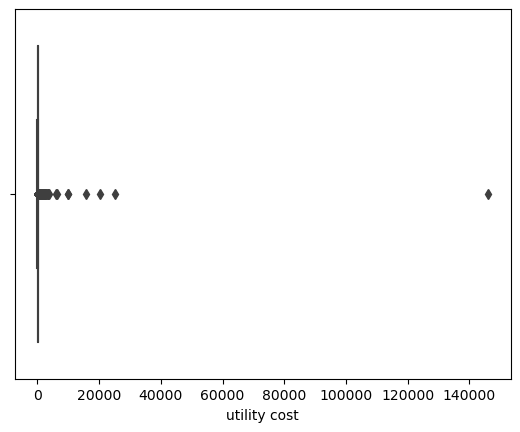

In [228]:
# Find outliers for 'utility cost'
sns.boxplot(apt_no_dups['utility cost'])

In [229]:
apt_no_dups[apt_no_dups['utility cost'] >500]

,state,utility cost,heating type,new construction,balcony,picturecount,pricetrend,year constructed,kitchen,cellar,base rent,condition,pets allowed,lift,type of flat,zipcode,number of rooms,garden,district,city
531,Hessen,740.0,nan,False,True,10,5.16,1973.0,True,True,4500.0,mint_condition,nan,True,penthouse,60325,6.0,False,Frankfurt_am_Main,Westend_Süd
538,Hessen,600.0,central_heating,False,True,22,3.66,1984.0,True,True,1400.0,fully_renovated,negotiable,False,terraced_flat,61273,6.0,True,Hochtaunuskreis,Wehrheim
782,Berlin,700.0,central_heating,False,True,40,7.04,1998.0,True,True,1720.0,refurbished,negotiable,False,roof_storey,12347,4.0,True,Berlin,Britz_Neukölln
1153,Hamburg,510.0,nan,False,True,9,4.93,1900.0,True,True,2500.0,mint_condition,negotiable,True,apartment,22301,4.0,True,Hamburg,Winterhude
1227,Berlin,513.0,central_heating,False,True,14,7.21,1900.0,True,False,3700.0,modernized,no,False,loft,10405,4.0,True,Berlin,Prenzlauer_Berg_Prenzlauer_Berg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268015,Berlin,696.0,central_heating,False,True,18,6.57,1998.0,False,True,3800.0,mint_condition,nan,True,apartment,10117,5.0,False,Berlin,Mitte_Mitte
268119,Mecklenburg_Vorpommern,575.0,central_heating,False,True,74,4.17,1896.0,True,True,2250.0,refurbished,negotiable,False,half_basement,18055,4.0,False,Rostock,Stadtmitte
268345,Bayern,552.0,central_heating,False,True,35,6.21,2011.0,True,False,4500.0,mint_condition,nan,True,apartment,80797,4.0,False,München,Schwabing_West
268478,Hessen,700.0,nan,False,True,18,3.96,1993.0,True,True,1800.0,modernized,nan,True,apartment,61462,4.5,False,Hochtaunuskreis,Königstein_im_Taunus


#### Note: When looking at the utility outliers, the high utilities often align with high rents (~4,500).  One residence is labeled as a pent house, so it's plausible that utilities would be high there, others are labeled as 'mint condition' or 'refurbished' and often have more rooms.  I'm going to cap utilities at 1200, which means 1,288 rows will be removed.

In [230]:
# create new data frame with no outliers
apt_out = apt_no_dups[apt_no_dups['utility cost'] <1200]

In [231]:
# check result
apt_out.head()

,state,utility cost,heating type,new construction,balcony,picturecount,pricetrend,year constructed,kitchen,cellar,base rent,condition,pets allowed,lift,type of flat,zipcode,number of rooms,garden,district,city
0,Nordrhein_Westfalen,245.00,central_heating,False,False,6,4.62,1965.0,False,True,595.0,well_kept,nan,False,ground_floor,44269,4.0,True,Dortmund,Schüren
1,Rheinland_Pfalz,134.00,self_contained_central_heating,False,True,8,3.47,1871.0,False,False,800.0,refurbished,no,False,ground_floor,67459,3.0,False,Rhein_Pfalz_Kreis,Böhl_Iggelheim
2,Sachsen,255.00,floor_heating,True,True,8,2.72,2019.0,False,True,965.0,first_time_use,nan,True,apartment,1097,3.0,False,Dresden,Äußere_Neustadt_Antonstadt
3,Sachsen,58.15,district_heating,False,True,9,1.53,1964.0,False,False,343.0,nan,nan,False,other,9599,3.0,False,Mittelsachsen_Kreis,Freiberg
4,Bremen,138.00,self_contained_central_heating,False,True,19,2.46,1950.0,False,False,765.0,refurbished,nan,False,apartment,28213,3.0,False,Bremen,Neu_Schwachhausen


In [232]:
# check result
apt_out[apt_out['utility cost'] >1200]

,state,utility cost,heating type,new construction,balcony,picturecount,pricetrend,year constructed,kitchen,cellar,base rent,condition,pets allowed,lift,type of flat,zipcode,number of rooms,garden,district,city


In [233]:
apt_out.shape

(265894, 20)

### Year Constructed

/Users/catherinemikelson/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year constructed'>

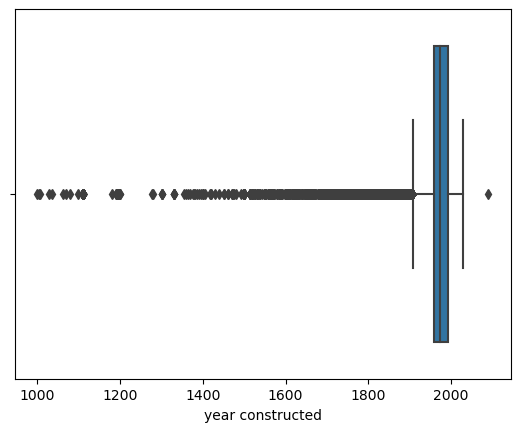

In [234]:
# Find outliers for 'year constructed'
sns.boxplot(apt_out['year constructed'])

In [235]:
# examine outliers
apt_out[apt_out['year constructed'] <1600]

,state,utility cost,heating type,new construction,balcony,picturecount,pricetrend,year constructed,kitchen,cellar,base rent,condition,pets allowed,lift,type of flat,zipcode,number of rooms,garden,district,city
471,Niedersachsen,80.0,nan,False,True,10,3.57,1500.0,True,False,1650.00,mint_condition,nan,False,maisonette,21335,3.5,False,Lüneburg_Kreis,Lüneburg
781,Thüringen,150.0,heat_pump,False,True,8,2.85,1573.0,True,True,800.00,refurbished,nan,False,apartment,37339,3.0,False,Eichsfeld_Kreis,Teistungen
2152,Nordrhein_Westfalen,109.0,central_heating,False,False,7,3.45,1111.0,False,True,415.00,nan,nan,False,apartment,47229,3.0,False,Duisburg,Friemersheim
2409,Baden_Württemberg,0.0,nan,False,False,25,4.56,1572.0,False,False,2550.00,nan,nan,False,apartment,70794,4.5,False,Esslingen_Kreis,Filderstadt
2536,Bayern,100.0,self_contained_central_heating,False,False,23,6.06,1534.0,False,False,730.00,refurbished,no,False,apartment,89415,3.0,True,Dillingen_an_der_Donau_Kreis,Lauingen_Donau
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264129,Sachsen,140.0,central_heating,False,False,9,1.18,1530.0,True,True,555.00,refurbished,negotiable,False,maisonette,9599,2.0,False,Mittelsachsen_Kreis,Freiberg
265442,Berlin,97.0,central_heating,False,True,8,6.82,1111.0,False,True,365.87,nan,nan,False,apartment,13403,2.0,False,Berlin,Reinickendorf_Reinickendorf
265646,Bayern,100.0,central_heating,False,True,26,4.13,1598.0,True,False,340.00,well_kept,no,False,apartment,94032,1.0,False,Passau,Innstadt
267018,Sachsen,69.0,central_heating,False,True,8,4.33,1111.0,True,True,380.00,nan,nan,False,apartment,4317,2.0,False,Leipzig,Reudnitz_Thonberg


In [236]:
# examine outliers
apt_out[apt_out['year constructed'] >2019]

,state,utility cost,heating type,new construction,balcony,picturecount,pricetrend,year constructed,kitchen,cellar,base rent,condition,pets allowed,lift,type of flat,zipcode,number of rooms,garden,district,city
177,Nordrhein_Westfalen,116.0,heat_pump,True,True,9,3.54,2020.0,False,True,710.00,first_time_use,no,True,apartment,33098,3.0,False,Paderborn_Kreis,Paderborn
193,Nordrhein_Westfalen,207.0,floor_heating,True,True,3,2.84,2020.0,False,True,556.35,first_time_use,nan,True,ground_floor,33659,2.0,False,Bielefeld,Senne
659,Bayern,250.0,central_heating,True,True,6,4.52,2020.0,False,True,1390.00,first_time_use,no,True,ground_floor,85464,4.0,True,Erding_Kreis,Finsing
671,Mecklenburg_Vorpommern,150.0,nan,True,True,6,3.74,2020.0,False,False,600.00,nan,nan,False,nan,18273,3.0,False,Güstrow_Kreis,Güstrow
845,Baden_Württemberg,102.0,heat_pump,True,True,4,6.56,2020.0,True,True,750.00,first_time_use,nan,True,apartment,78532,2.0,False,Tuttlingen_Kreis,Tuttlingen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268543,Niedersachsen,175.0,gas_heating,True,True,3,3.26,2020.0,False,False,680.00,first_time_use,nan,True,apartment,49082,2.0,False,Osnabrück,Nahne
268601,Sachsen,135.0,floor_heating,True,True,11,0.45,2020.0,False,True,552.00,first_time_use_after_refurbishment,yes,True,raised_ground_floor,9111,4.5,False,Chemnitz,Zentrum
268744,Rheinland_Pfalz,170.0,district_heating,True,True,8,3.60,2020.0,True,True,1215.00,first_time_use,negotiable,True,penthouse,54292,3.0,False,Trier,Maximin
268774,Bayern,200.0,central_heating,True,True,20,5.64,2020.0,True,True,1906.00,first_time_use,negotiable,True,terraced_flat,85764,4.0,True,München_Kreis,Oberschleißheim


#### Note: It looks as though many outliers have the year listed as 1111 - probably a shortcut to note that the year built is unknown.  Some of the buildings listed in the 1500s are listed as 'maisonette'.  I think it's plausible that some buildings could date back to 1500, so I will remove any prior to then.  The most recent data is from 2019, however some values reference 2020 and are listed as new construction.  Any values beyond 2020 will be removed.

In [237]:
# remove outliers
apt_out = apt_out[(apt_out['year constructed'] <= 2020) & (apt_out['year constructed'] >=1500)]

In [238]:
# check result
apt_out[(apt_out['year constructed'] > 2020) & (apt_out['year constructed'] <1500)]

,state,utility cost,heating type,new construction,balcony,picturecount,pricetrend,year constructed,kitchen,cellar,base rent,condition,pets allowed,lift,type of flat,zipcode,number of rooms,garden,district,city


In [239]:
apt_out.shape

(265724, 20)

### Base Rent

/Users/catherinemikelson/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='base rent'>

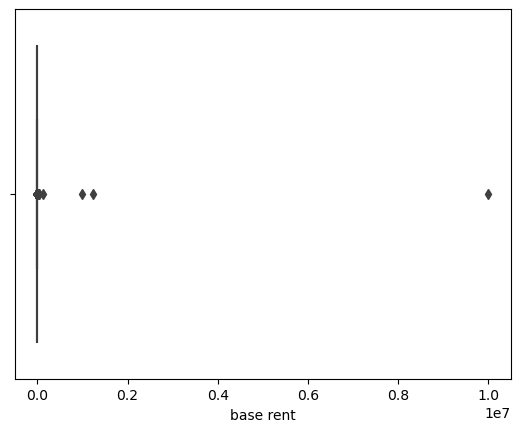

In [240]:
# Find outliers for 'base rent'
sns.boxplot(apt_out['base rent'])

In [241]:
# examine outliers
apt_out[apt_out['base rent'] >10000]

,state,utility cost,heating type,new construction,balcony,picturecount,pricetrend,year constructed,kitchen,cellar,base rent,condition,pets allowed,lift,type of flat,zipcode,number of rooms,garden,district,city
8406,Baden_Württemberg,135.0,nan,False,True,13,3.90,1973.0,True,False,1234567.0,nan,nan,False,apartment,68789,4.0,False,Rhein_Neckar_Kreis,Sankt_Leon_Rot
16731,Sachsen,135.0,central_heating,False,True,1,4.07,1973.0,False,True,120000.0,need_of_renovation,nan,False,raised_ground_floor,4157,3.0,False,Leipzig,Gohlis_Mitte
71110,Berlin,400.0,heat_pump,True,True,34,8.01,2018.0,True,False,10816.0,first_time_use,negotiable,True,nan,12209,11.0,True,Berlin,Lichterfelde_Steglitz
96351,Bayern,600.0,central_heating,False,True,17,5.71,2015.0,True,True,11400.0,mint_condition,nan,False,loft,81675,7.0,False,München,Haidhausen
112744,Bayern,780.0,floor_heating,True,True,14,5.23,2019.0,True,True,10700.0,first_time_use,nan,True,penthouse,81925,5.5,True,München,Bogenhausen
148017,Nordrhein_Westfalen,660.0,central_heating,False,False,6,3.28,1973.0,True,False,10440.0,fully_renovated,no,False,nan,44867,18.0,False,Bochum,Westenfeld
163402,Berlin,135.0,district_heating,False,True,27,8.77,2012.0,True,True,15000.0,first_time_use,negotiable,True,other,10117,4.0,False,Berlin,Mitte_Mitte
176647,Bremen,78.0,central_heating,False,False,2,4.62,1957.0,False,True,30990.0,nan,negotiable,False,roof_storey,28277,3.0,False,Bremen,Kattenesch
181618,Sachsen,165.0,central_heating,False,False,11,1.41,1973.0,False,False,39200.0,mint_condition,nan,True,roof_storey,1109,1.0,False,Dresden,Klotzsche
196419,Berlin,600.0,district_heating,False,True,14,8.70,1998.0,True,True,12000.0,mint_condition,no,True,apartment,10179,4.0,True,Berlin,Mitte_Mitte


In [242]:
# examine outliers
apt_out[apt_out['base rent'] <125]

,state,utility cost,heating type,new construction,balcony,picturecount,pricetrend,year constructed,kitchen,cellar,base rent,condition,pets allowed,lift,type of flat,zipcode,number of rooms,garden,district,city
201,Sachsen,90.00,central_heating,False,False,7,0.00,1900.0,False,False,0.0,fully_renovated,nan,False,apartment,8058,2.0,False,Zwickau,Nordvorstadt
505,Sachsen_Anhalt,80.00,central_heating,False,False,7,3.23,1973.0,False,False,110.0,refurbished,nan,False,nan,6110,1.0,False,Halle_Saale,Lutherplatz/Thüringer_Bahnhof
528,Thüringen,90.00,central_heating,False,True,7,0.00,1984.0,False,True,110.0,modernized,nan,False,apartment,99817,1.0,False,Eisenach,Stadtmitte
1377,Saarland,135.00,nan,False,False,7,2.46,1956.0,False,False,0.0,fully_renovated,no,False,apartment,66740,1.0,False,Saarlouis_Kreis,Saarlouis
2045,Nordrhein_Westfalen,154.00,central_heating,False,False,1,3.30,1902.0,False,False,0.0,well_kept,yes,False,nan,59174,2.5,False,Unna_Kreis,Kamen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265287,Saarland,135.00,floor_heating,False,False,0,1.72,1973.0,False,False,0.0,nan,nan,False,roof_storey,66333,1.0,False,Stadtverband_Saarbrücken_Kreis,Völklingen
265934,Sachsen_Anhalt,132.48,district_heating,False,False,11,1.67,1973.0,False,False,99.0,modernized,yes,False,apartment,39288,3.0,False,Jerichower_Land_Kreis,Burg
266668,Bayern,0.00,gas_heating,False,True,21,3.17,1973.0,False,False,22.0,modernized,nan,False,other,84387,1.0,True,Rottal_Inn_Kreis,Kirchdorf_am_Inn
266925,Niedersachsen,170.00,central_heating,False,True,18,4.11,1997.0,False,False,0.0,well_kept,nan,False,apartment,26725,3.0,False,Emden,Stadtzentrum


#### Note: There are many high outliers that fit the bill for a luxury apartment.  Based on the results, 15,000 seems a reaonable cap that would allow for inclusion of luxury rentals but eliminate erronious high values.  Low values are studio apartmentments generally.  Below 125, the utility cost begins to match rental cost, which seems like an error.  So, I'll remove values below 125.

In [243]:
# remove outliers
apt_out = apt_out[(apt_out['base rent'] > 125) & (apt_out['base rent'] < 15000)]

In [244]:
# check result
apt_out[(apt_out['base rent'] <= 125) & (apt_out['base rent'] >= 15000)]

,state,utility cost,heating type,new construction,balcony,picturecount,pricetrend,year constructed,kitchen,cellar,base rent,condition,pets allowed,lift,type of flat,zipcode,number of rooms,garden,district,city


In [245]:
apt_out.shape

(265293, 20)

### Number of Rooms

/Users/catherinemikelson/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='number of rooms'>

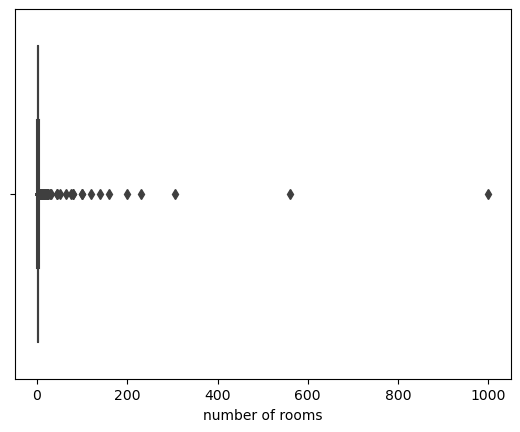

In [246]:
# Find outliers for 'number of rooms'
sns.boxplot(apt_out['number of rooms'])

In [254]:
# examine outliers
apt_out[apt_out['number of rooms'] >10]

,state,utility cost,heating type,new construction,balcony,picturecount,pricetrend,year constructed,kitchen,cellar,base rent,condition,pets allowed,lift,type of flat,zipcode,number of rooms,garden,district,city
17859,Bayern,135.0,nan,False,False,10,4.11,1973.0,False,False,2980.0,well_kept,nan,False,apartment,87437,12.0,False,Kempten_Allgäu,Auf_dem_Lindenberg
28227,Schleswig_Holstein,520.0,gas_heating,False,False,2,3.10,1973.0,False,False,1705.0,well_kept,nan,False,other,24848,11.0,False,Schleswig_Flensburg_Kreis,Kropp
71110,Berlin,400.0,heat_pump,True,True,34,8.01,2018.0,True,False,10816.0,first_time_use,negotiable,True,nan,12209,11.0,True,Berlin,Lichterfelde_Steglitz
73129,Sachsen,800.0,central_heating,False,True,22,4.14,1994.0,True,True,3500.0,first_time_use,nan,True,apartment,4155,11.0,True,Leipzig,Gohlis_Süd
88504,Mecklenburg_Vorpommern,87.0,central_heating,False,True,26,6.99,1988.0,True,False,480.0,first_time_use,negotiable,False,ground_floor,18196,12.0,True,Bad_Doberan_Kreis,Dummerstorf
119135,Berlin,1000.0,floor_heating,False,True,20,5.83,2000.0,True,True,6500.0,well_kept,nan,True,roof_storey,14193,11.0,True,Berlin,Grunewald_Wilmersdorf
123659,Nordrhein_Westfalen,100.0,nan,True,True,0,2.88,2019.0,False,False,650.0,first_time_use,negotiable,True,ground_floor,44319,11.0,True,Dortmund,Asseln
127873,Hessen,500.0,gas_heating,False,True,13,4.64,1984.0,True,True,2720.0,well_kept,nan,True,apartment,61440,11.0,False,Hochtaunuskreis,Oberursel_Taunus
134464,Bayern,135.0,central_heating,False,False,19,2.34,1900.0,False,False,700.0,well_kept,nan,False,nan,95346,11.0,False,Kulmbach_Kreis,Stadtsteinach
159423,Rheinland_Pfalz,200.0,nan,False,False,7,4.76,1731.0,False,True,2500.0,nan,nan,False,nan,56626,12.0,False,Mayen_Koblenz_Kreis,Andernach


In [248]:
# examine outliers
apt_out[apt_out['number of rooms'] ==0]

,state,utility cost,heating type,new construction,balcony,picturecount,pricetrend,year constructed,kitchen,cellar,base rent,condition,pets allowed,lift,type of flat,zipcode,number of rooms,garden,district,city


#### Note: After examining the high values, values above 12 for the most part have a conflict between number of rooms and base rent, so I will remove them.  There are no values below 1 - the fewest number of rooms possible.

In [249]:
# remove outliers
apt_out = apt_out[apt_out['number of rooms'] <= 12]

In [250]:
# check result
apt_out[apt_out['number of rooms']>12]

,state,utility cost,heating type,new construction,balcony,picturecount,pricetrend,year constructed,kitchen,cellar,base rent,condition,pets allowed,lift,type of flat,zipcode,number of rooms,garden,district,city


In [251]:
# Final Check
apt_out.shape

(265259, 20)

#### Note: All looks good here!

## 4. Export Data

In [252]:
# apt_clean
apt_out.to_csv(os.path.join(path, 'Data', 'Prepared Data', 'apt_clean.csv'))